In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 11s 28ms/step - loss: 0.6374 - accuracy: 0.8119 - val_loss: 0.2989 - val_accuracy: 0.9058
Epoch 2/2
375/375 [==============================] - 12s 32ms/step - loss: 0.2448 - accuracy: 0.9240 - val_loss: 0.1870 - val_accuracy: 0.9450
Epoch 1/2
375/375 [==============================] - 8s 20ms/step - loss: 0.2847 - accuracy: 0.9162 - val_loss: 0.1433 - val_accuracy: 0.9594
Epoch 2/2
375/375 [==============================] - 7s 19ms/step - loss: 0.1173 - accuracy: 0.9655 - val_loss: 0.1139 - val_accuracy: 0.9665


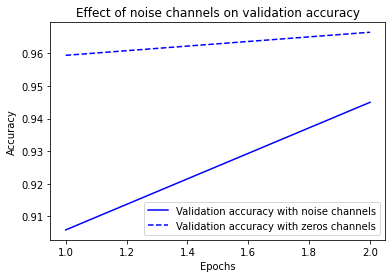

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 2.3172 - accuracy: 0.1041 - val_loss: 2.3052 - val_accuracy: 0.1046
Epoch 2/2
375/375 [==============================] - 4s 11ms/step - loss: 2.3003 - accuracy: 0.1157 - val_loss: 2.3112 - val_accuracy: 0.1026


In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 999.5543 - accuracy: 0.3535 - val_loss: 3.9214 - val_accuracy: 0.3203
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 3.4624 - accuracy: 0.2356 - val_loss: 2.2024 - val_accuracy: 0.2791


In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 5s 12ms/step - loss: 0.3604 - accuracy: 0.9148 - val_loss: 0.2070 - val_accuracy: 0.9437
Epoch 2/2
375/375 [==============================] - 4s 12ms/step - loss: 0.1388 - accuracy: 0.9638 - val_loss: 0.1638 - val_accuracy: 0.9641


In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 4ms/step - loss: 0.6594 - accuracy: 0.8395 - val_loss: 0.3613 - val_accuracy: 0.9007
Epoch 2/2
375/375 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.9041 - val_loss: 0.3070 - val_accuracy: 0.9159


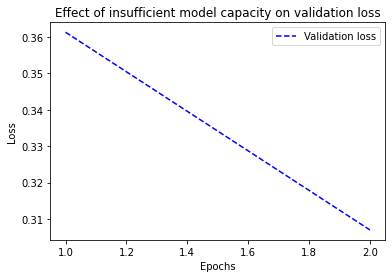

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.3616 - accuracy: 0.8980 - val_loss: 0.1885 - val_accuracy: 0.9449
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1647 - accuracy: 0.9514 - val_loss: 0.1705 - val_accuracy: 0.9489


In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/2
30/30 [==============================] - 2s 51ms/step - loss: 0.5059 - accuracy: 0.7865 - val_loss: 0.3715 - val_accuracy: 0.8771
Epoch 2/2
30/30 [==============================] - 1s 36ms/step - loss: 0.2995 - accuracy: 0.9047 - val_loss: 0.3250 - val_accuracy: 0.8708


In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 73ms/step - loss: 0.6462 - accuracy: 0.6211 - val_loss: 0.6107 - val_accuracy: 0.6259
Epoch 2/2
30/30 [==============================] - 1s 45ms/step - loss: 0.5760 - accuracy: 0.7369 - val_loss: 0.5641 - val_accuracy: 0.7601


In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 10s 302ms/step - loss: 0.5617 - accuracy: 0.7475 - val_loss: 0.3090 - val_accuracy: 0.8866
Epoch 2/2
30/30 [==============================] - 9s 291ms/step - loss: 0.2482 - accuracy: 0.9073 - val_loss: 0.2998 - val_accuracy: 0.8784


In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 44ms/step - loss: 0.5836 - accuracy: 0.7827 - val_loss: 0.5151 - val_accuracy: 0.8102
Epoch 2/2
30/30 [==============================] - 1s 35ms/step - loss: 0.3959 - accuracy: 0.8951 - val_loss: 0.3851 - val_accuracy: 0.8864


In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 44ms/step - loss: 0.6241 - accuracy: 0.6505 - val_loss: 0.5036 - val_accuracy: 0.8473
Epoch 2/2
30/30 [==============================] - 1s 34ms/step - loss: 0.5005 - accuracy: 0.7811 - val_loss: 0.4113 - val_accuracy: 0.8680
